# Close up contour plots of an Artifacts for HD167665-1a:


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors, ticker, cm
from astropy.io import fits


### Aritifacts to try and find

Chip1 : 0-50 pixels,
Chip1 : 350-450 pixels,
Chip2 : 400-550 pixels,  
Chip3 : 250-500 pixels,
Chip4 : 0-50 pixels,
Chip4: 800-900 pixels,

In [2]:
# Change for HD167665-1a 
nodA3  = "../../../data/Crires/BDs-DRACS/HD202206-1-copy_to_find_artifacts/CRIRE.2012-07-12T07:08:59.651.fits"
nodB3  = "../../../data/Crires/BDs-DRACS/HD202206-1-copy_to_find_artifacts/CRIRE.2012-07-12T07:12:39.576.fits"
nodB4  = "../../../data/Crires/BDs-DRACS/HD202206-1-copy_to_find_artifacts/CRIRE.2012-07-12T07:16:06.773.fits"
nodA4  = "../../../data/Crires/BDs-DRACS/HD202206-1-copy_to_find_artifacts/CRIRE.2012-07-12T07:19:47.498.fits"

A3_hdulist = fits.open(nodA3 ,memmap=True)
A4_hdulist = fits.open(nodA4 ,memmap=True)
B3_hdulist = fits.open(nodB3 ,memmap=True)
B4_hdulist = fits.open(nodB4 ,memmap=True)

In [3]:
# Load Master Dark and Master Flat
dark = "../../../data/Crires/BDs-DRACS/HD202206-1-copy_to_find_artifacts/MasterDarkSpec_2.fits"
flat = "../../../data/Crires/BDs-DRACS/HD202206-1-copy_to_find_artifacts/FlatR_2.fits"

Flat = fits.open(flat)
Dark = fits.open(dark)

Flatdata = Flat[0].data
Darkdata = Dark[0].data

In [4]:
# Extract the second detector on the bad nods and dark and flat corect
nodA3_2 = (A3_hdulist[2].data - Darkdata)/ Flatdata    
nodA4_2 = (A4_hdulist[2].data - Darkdata)/ Flatdata     
nodB3_2 = (B3_hdulist[2].data - Darkdata)/ Flatdata    # Errors x 450-650,
nodB4_2 = (B4_hdulist[2].data - Darkdata)/ Flatdata    # Errors x 150-400,
#nodA3_2 = (A3_hdulist[2].data - Darkdata)/ Flatdata    
#nodA4_2 = (A4_hdulist[2].data - Darkdata)/ Flatdata     
#nodB3_2 = (B3_hdulist[2].data - Darkdata)/ Flatdata    # Errors x 450-650,
#nodB4_2 = (B4_hdulist[2].data - Darkdata)/ Flatdata    # Errors x 150-400,

# A nods 200 - 250
# B nods 320 - 370    
      

In [5]:
# Get the tweo extracted nods
nodB3_extracted = "../../../data/Crires/BDs-DRACS/HD202206-1-copy_to_find_artifacts/CRIRE.2012-07-12T07:12:39.576_2.nod.ms.fits"
nodB4_extracted = "../../../data/Crires/BDs-DRACS/HD202206-1-copy_to_find_artifacts/CRIRE.2012-07-12T07:16:06.773_2.nod.ms.fits"

extracted_B3 = fits.getdata(nodB3_extracted)
extracted_B4 = fits.getdata(nodB4_extracted)



In [6]:
#Setup mesh grids

x = np.arange(1024)
y = np.arange(512)
x2 = np.arange(300)+400
y2 = np.arange(15)+335

X, Y = np.meshgrid(x, y)

X2, Y2 = np.meshgrid(x2, y2)

X3, Y3 = np.meshgrid(x, y2)

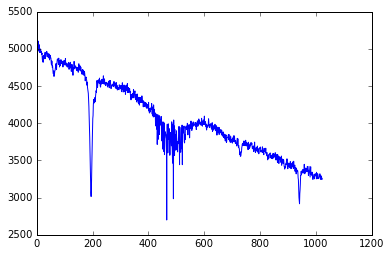

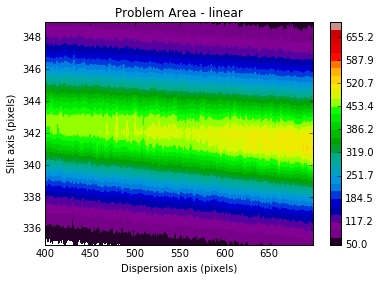

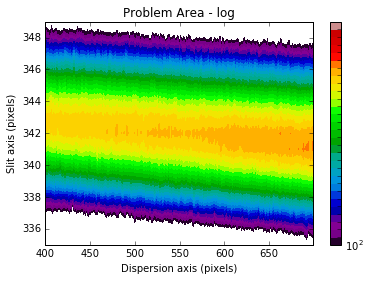

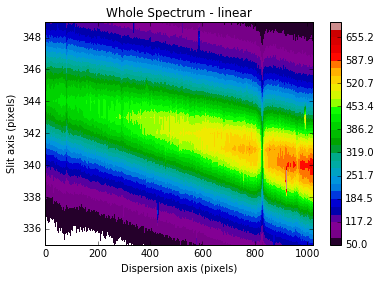

/home/jneal/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:1538: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


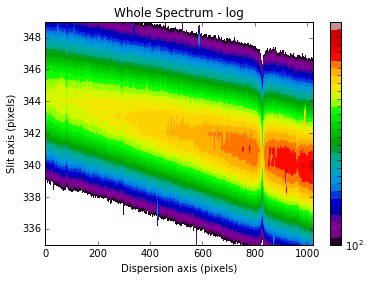

In [7]:
V1 = np.linspace(50, 700, 30, endpoint=True)
V2 = 10**np.linspace(2, 2.9, 30, endpoint=True)


#plt.imshow(nodB3_2, cmap="hot")
#plt.show()
B3_slice = (nodB3_2-nodA3_2)[335:350, 400:700]
#plt.imshow(B3_slice, cmap="hot", vmin=400, vmax=700)
#cbar = plt.colorbar()
#plt.show()

plt.figure()
plt.plot(extracted_B3)
plt.show()

plt.figure()
cs = plt.contourf(X2, Y2, B3_slice, V1, cmap="spectral")  
cbar = plt.colorbar()
plt.xlabel("Dispersion axis (pixels)")
plt.ylabel("Slit axis (pixels)")
plt.title("Problem Area - linear")
#cs.set_cmap('spectral')
plt.show()

plt.figure()
cs = plt.contourf(X2, Y2, B3_slice, V2, locator=ticker.LogLocator(), cmap="spectral") #
cbar = plt.colorbar(ticks=V2)
plt.xlabel("Dispersion axis (pixels)")
plt.ylabel("Slit axis (pixels)")
plt.title("Problem Area - log")
plt.show()


plt.figure()
cs = plt.contourf(X3, Y3, nodB3_2[335:350,:], V1, cmap="spectral")
cbar = plt.colorbar()
plt.xlabel("Dispersion axis (pixels)")
plt.ylabel("Slit axis (pixels)")
plt.title("Whole Spectrum - linear")
plt.show()

plt.figure()
cs = plt.contourf(X3, Y3, nodB3_2[335:350,:], V2, locator=ticker.LogLocator(), cmap="spectral")
cbar = plt.colorbar(ticks=V2)
plt.xlabel("Dispersion axis (pixels)")
plt.ylabel("Slit axis (pixels)")
plt.title("Whole Spectrum - log")
plt.show()

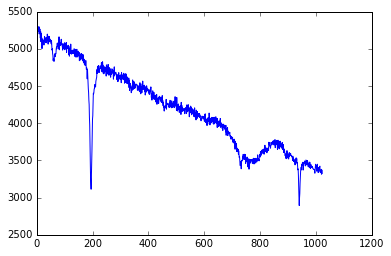

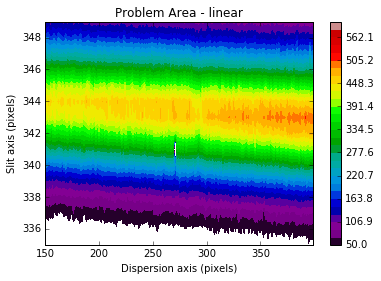

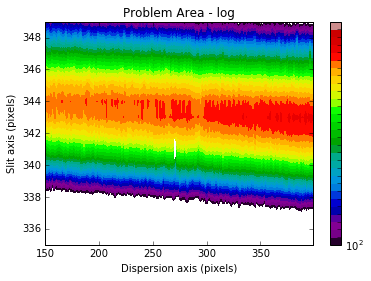

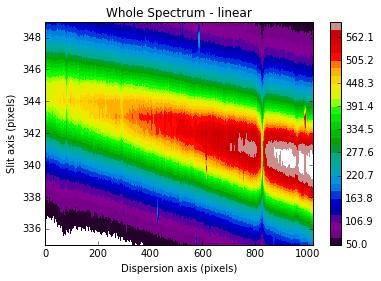

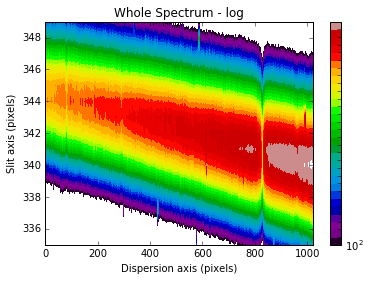

In [8]:
# B4 error

# Errors x 150-400,
# B nods 320 - 370  
#plt.imshow(nodB4_2, cmap='spectral', vmin=100, vmax=600)
#cbar = plt.colorbar()
#plt.show()
B4_slice = (nodB4_2-nodA4_2)[335:350, 150:400]
#B4_slice = nodB4_2[335:350, 150:400]
#plt.imshow(B4_slice, cmap='spectral', vmin=400, vmax=600)
#cbar = plt.colorbar()
#plt.show()

plt.figure()
plt.plot(extracted_B4)
plt.show()

x2 = np.arange(250) + 150
y2 = np.arange(15) + 335

X2, Y2 = np.meshgrid(x2, y2)
V1 = np.linspace(50, 600, 30, endpoint=True)
V2 = 10**np.linspace(2, 2.8, 30, endpoint=True)

plt.figure()
cs = plt.contourf(X2, Y2, B4_slice, V1, cmap='spectral') #locator=ticker.LogLocator()
cbar = plt.colorbar()
plt.xlabel("Dispersion axis (pixels)")
plt.ylabel("Slit axis (pixels)")
plt.title("Problem Area - linear")
plt.show()

plt.figure()
cs = plt.contourf(X2, Y2, B4_slice, V2, locator=ticker.LogLocator(), cmap='spectral') #
cbar = plt.colorbar(ticks=V2)
plt.xlabel("Dispersion axis (pixels)")
plt.ylabel("Slit axis (pixels)")
plt.title("Problem Area - log")
plt.show()

X3, Y3 = np.meshgrid(x, y2)

plt.figure()
cs = plt.contourf(X3, Y3, nodB4_2[335:350,:], V1, cmap='spectral')
cbar = plt.colorbar()
plt.xlabel("Dispersion axis (pixels)")
plt.ylabel("Slit axis (pixels)")
plt.title("Whole Spectrum - linear")
plt.show()

plt.figure()
cs = plt.contourf(X3, Y3, nodB4_2[335:350,:], V2, locator=ticker.LogLocator(), cmap='spectral')
cbar = plt.colorbar(ticks=V2)
plt.xlabel("Dispersion axis (pixels)")
plt.ylabel("Slit axis (pixels)")
plt.title("Whole Spectrum - log")
plt.show()

In [ ]:
# line by line looking at aperature 
#B3_slice
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

def fit_nod_and_get_area(nod_slice):
    x = np.arange(len(nod_slice))
    y = nod_slice
    
    n = len(x)                          
    mean = np.sum(x * y) / np.sum(y)
    sigma = np.sqrt(abs(np.sum(y * (x - mean)**2) / np.sum(y)))   
    #print(n)
    #print("sigma", sigma)
    #print("mean", mean)
    def gaus(x,a,x0,sigma):
        return abs(a)*exp(-(x-x0)**2/(2*sigma**2))

    popt, pcov = curve_fit(gaus, x, y, p0=[np.max(y), mean, sigma])    
    
    #plt.plot(x, y,'b+:',label='data')
    #plt.plot(x, gaus(x,*popt),'ro:',label='fit')
    #plt.show()
    
    # Fits well so now calculate the area
    #x_area = np.linspace(x[0], x[-1], 2000)
    x_area2 = np.arange(x[0],x[-1],0.001)
   # Area = np.sum(gaus(x_area,*popt)[1:]*(x_area[1:]-x_area[:-1]))
    Area2 = np.sum(gaus(x_area2,*popt)[1:]*(0.001))
   # print("Area 1", Area, "\nArea2", Area2 )
    return Area2, popt

flux_area3 = np.empty(1024)
amp_params3 = np.empty(1024)
mean_params3 = np.empty(1024)
sigma_params3 = np.empty(1024)
for column_num in range(0, 1024):
    nod_slice = (nodB3_2-nodA3_2)[325:360, column_num]
    #print(column_num)
    #flux_area[column_num], params[column_num] = fit_nod_and_get_area(nod_slice)
    f, p = fit_nod_and_get_area(nod_slice)
    flux_area3[column_num] = f
    amp_params3[column_num] = p[0]
    mean_params3[column_num] = p[1]
    sigma_params3[column_num] = p[2]
    


flux_area4 = np.empty(1024)
amp_params4 = np.empty(1024)
mean_params4 = np.empty(1024)
sigma_params4 = np.empty(1024)
for column_num in range(0, 1024):
    nod_slice = (nodB4_2-nodA4_2)[325:360, column_num]
    
    f, p = fit_nod_and_get_area(nod_slice)
    flux_area4[column_num] = f
    amp_params4[column_num] = p[0]
    mean_params4[column_num] = p[1]
    sigma_params4[column_num] = p[2]

plt.plot(flux_area3, label="B3")
plt.plot(flux_area4, label="B4")
plt.title("Extracted spectra")
plt.show()

plt.plot(mean_params3)
plt.plot(mean_params4)
plt.title("Center of fitted lines")
plt.show()

plt.plot(amp_params3)
plt.plot(amp_params4)
plt.title("Amp of fitted lines")
plt.show()

plt.plot(sigma_params3)
plt.plot(sigma_params4)
plt.title("Sigma of fitted lines")
plt.show()



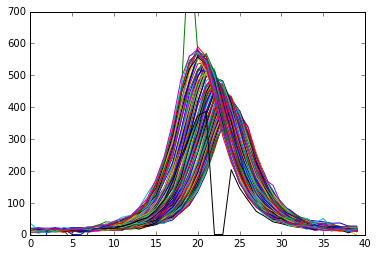

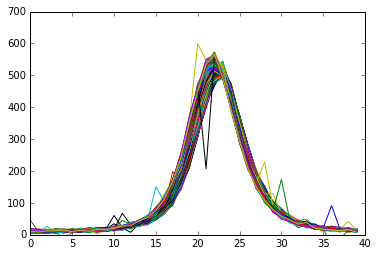

In [13]:
for column_num in range(0, 1023, 10):
    app = nodB3_2[320:360, column_num]
    plt.plot(app)
    
plt.ylim([0,700])
plt.show()

for column_num in range(400, 651):
    app = nodB4_2[320:360, column_num]
    plt.plot(app)
    
plt.ylim([0,700])   
plt.xlim()
plt.show()

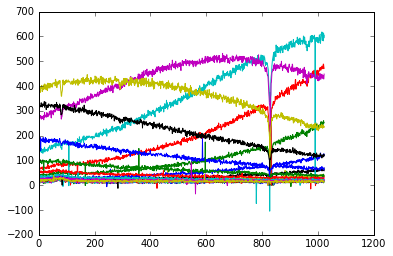

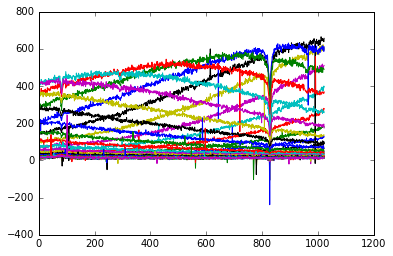

In [16]:
for row_num in range(320, 360, 2):
    app = nodB3_2[row_num, :]
    plt.plot(app)
    
#plt.ylim([0,700])
plt.show()

for row_num in range(320, 360, 1):
    app = nodB4_2[row_num, :]
    plt.plot(app)
    
#plt.ylim([0,700])   
#plt.xlim()
plt.show()